In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
pd.__version__

'0.23.4'

In [3]:
#from https://www.kaggle.com/blastchar/telco-customer-churn
#but apparently from https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Intro
This is a popular dataset from Kaggle, but originally from IBM Watson.
From the Kaggle description
> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
> The raw data contains 7043 rows (customers) and 21 columns (features).

The dataset being American, the currency will be assumed to be US Dollars (USD)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Data loading
Data loaded without issues, confirmed 7043 rows, the label being the last one "Churn"

In [5]:
for column in data.columns:
    print(column,data[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

# Parameters
Looking at the different values, majority seem to be categorical values, with 3 numerical values : tenure, MonthCharges and Total Charges.
Total charges seem to be incorrectly loaded as on object probably due to soe missing values.
From Kaggle:
* TotalCharges:
> The total amount charged to the customer
* MonthCharges:
> The amount charged to the customer monthly
* tenure:
> Number of months the customer has stayed with the company

In [6]:
#TotalCharges should be a number
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors="coerce")

In [7]:
#Nan for Total Charges is when the tenure is 0, 
pd.np.alltrue(data.TotalCharges.isna() == (data.tenure == 0))

True

In [8]:
#Replace Nan by 0
data.TotalCharges = data.TotalCharges.fillna(0)

# Total Charges to Numeric values
Changing the parameters to TotalCharges, there appear there are 10 missing values, all how which appear in the case the tenure is O.
Maybe this is the case were the customer just started a contract (all Churn are "No").
In practice this is only 10 out of 7043 rows, so we can simply replace NaN by 0.

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Numeric parameters.
Apart from the 10 TotalCharges replaced by 0, there is no missing values in the 3 numerical values.

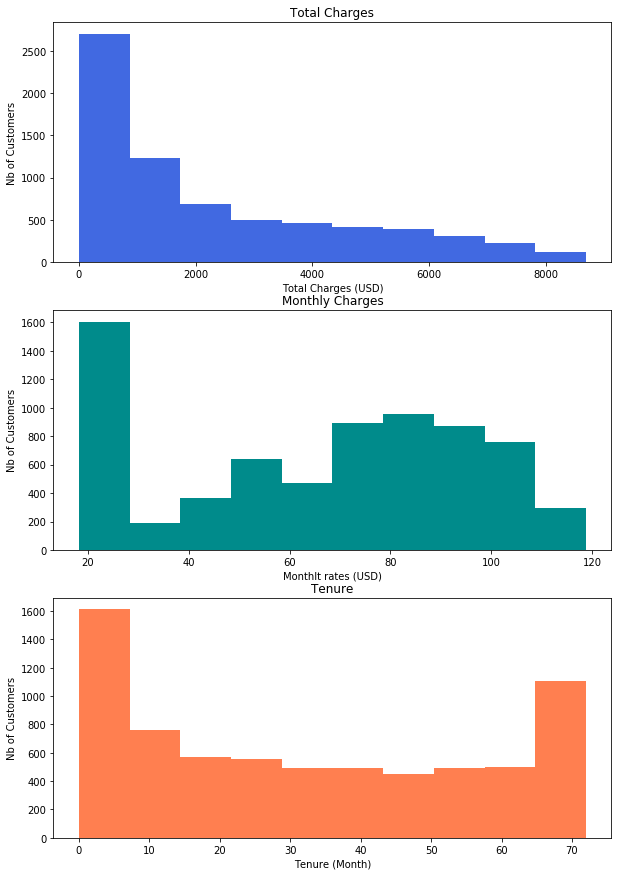

In [10]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.hist(data.TotalCharges,color='royalblue')
plt.title('Total Charges',loc='center')
plt.ylabel('Nb of Customers')
plt.xlabel('Total Charges (USD)')

plt.subplot(3, 1, 2)
plt.hist(data.MonthlyCharges,color='darkcyan')
plt.title('Monthly Charges')
plt.ylabel('Nb of Customers')
plt.xlabel('Monthlt rates (USD)')


plt.subplot(3, 1, 3)
plt.hist(data.tenure,color="coral")
plt.title('Tenure')
plt.ylabel('Nb of Customers')
plt.xlabel('Tenure (Month)')

plt.show()

# Numeric parameters histograms
## TotalCharges
The Total Charges does not have any surprises, we could expect the number going down.
Both Total Charges and Monthly Rates have a very high value near zeros, so it would be wroth to make sure that it is indeed representing of high number of low values and not something else, like null values or Freemium customers.
## Tenure
Overall the shape of the tenure is representative of a continuous customer onboarding, the longer the tenure the smaller the population, with a significant drop early in the tenure.

The shape of the tenure is surpring, with a peak at 72 Months exactely. It might be worth looking at the particular case of the people at 72 months to make sure they are not a special case in comparaison with the others. In particular they could truncate, the 72 in fact meaning "72 and more" from example.

This could also be explainable if we are only looking at the previous 72 Months of data, or if there was a very large quantity of people that became customers 72 months ago.

There is an unusual shape for the Monthly rate, the lowest number of customer between 30USD/Month to 50USD/Month and a peak around 80USD/Month.

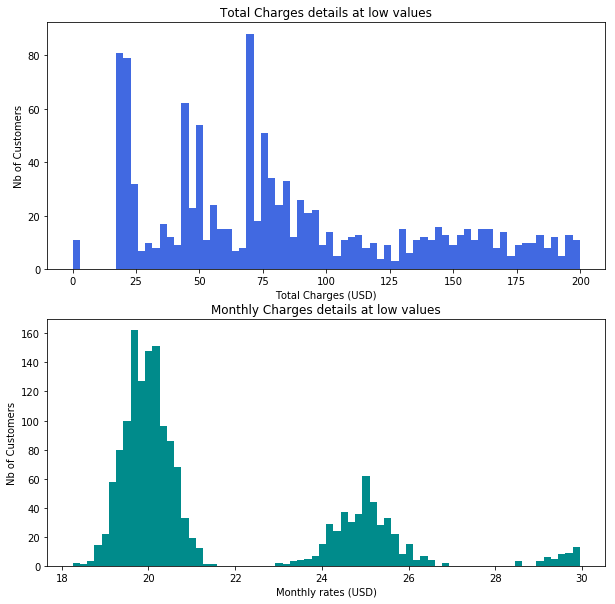

In [11]:
# Making sure the low values do not hide some bizarre value for Monthly Charges
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(data[data.TotalCharges<200].TotalCharges,bins=70,color='royalblue') 
plt.title('Total Charges details at low values')
plt.ylabel('Nb of Customers')
plt.xlabel('Total Charges (USD)')

plt.subplot(2, 1, 2)
plt.hist(data[data.MonthlyCharges<30].MonthlyCharges,bins=70,color='darkcyan')
plt.title('Monthly Charges details at low values')
plt.ylabel('Nb of Customers')
plt.xlabel('Monthly rates (USD)')
plt.show()

# Total Charges and Monthly Rates small values
Nothing surprising here, there is indeed a signficant of low values, with a peak for Monthle Charges around $20/Month and a Total charges just above $20 for Total charges.
The concern could have been around having a very large "no charge" or Free population that would have a very different behavior from the rest of the population.

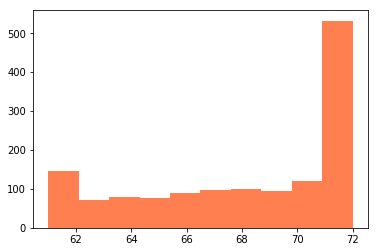

In [12]:
#The "peak" at 72 for tenure seems to look like a truncation of the tenure, would need to investigate.
plt.hist(data[data.tenure > 60].tenure,color="coral") 
plt.show()

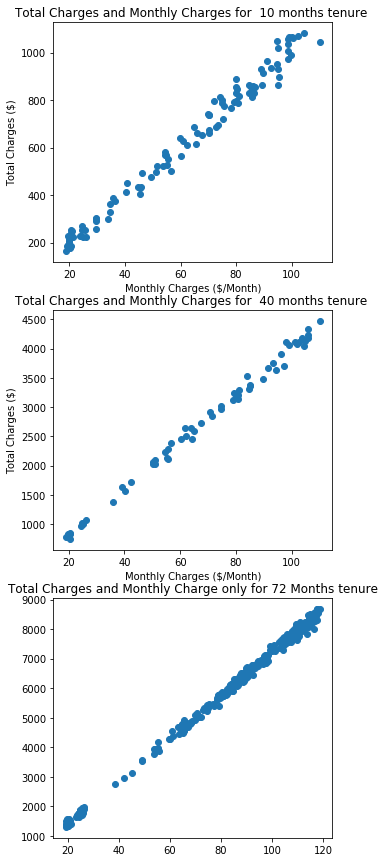

In [13]:
#No there is indeed a lot of people with a tenure of 72, 
#or this is the reference point for the data from 72 months ago.
#Even at 72 month tenure Total Charges are coherent with Monthly Charges
#When the model is sensitive to multicollinearity, like regression, we would need to exclude Total Charges.

min_tenure,max_tenure, tenure_step = 10,70,30
n_plot = (max_tenure-min_tenure)//tenure_step + 1
plt.figure(figsize=(5, 5*n_plot))
for (i,tenure) in enumerate(range(min_tenure,max_tenure,tenure_step)):
    this_tenure = data[data.tenure == tenure]
    plt.subplot(n_plot, 1, (i+1))
    plt.scatter(this_tenure.MonthlyCharges,this_tenure.TotalCharges)
    plt.title('Total Charges and Monthly Charges for  %s months tenure '%tenure)
    plt.ylabel('Total Charges ($)')
    plt.xlabel('Monthly Charges ($/Month)')

    
plt.subplot(n_plot, 1, n_plot)
tenure_72 = data[data.tenure == 72]
plt.scatter(tenure_72.MonthlyCharges,tenure_72.TotalCharges)
plt.title('Total Charges and Monthly Charge only for 72 Months tenure')

plt.show()

# 72 Months tenure
There is a large population at 72 Months.

For 3 different tenures, including the 72 Months one, we see the same relationship between Total Charges and Monthly Charges.

In case of a truncation of the tenure, we should have seem a Total Charges that was no longer proportionnal to Monthly Charges for the 72 Months tenure.

Looking at the correlation below, we can also confirm there is a multicollinearity between tenure, Total Charges and Monthly Rates. We might need to drop the Total Charges if the model used can be sensitive to those.




In [14]:
#Indeed Total Charges are correlated with Montly Charges and tenure
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


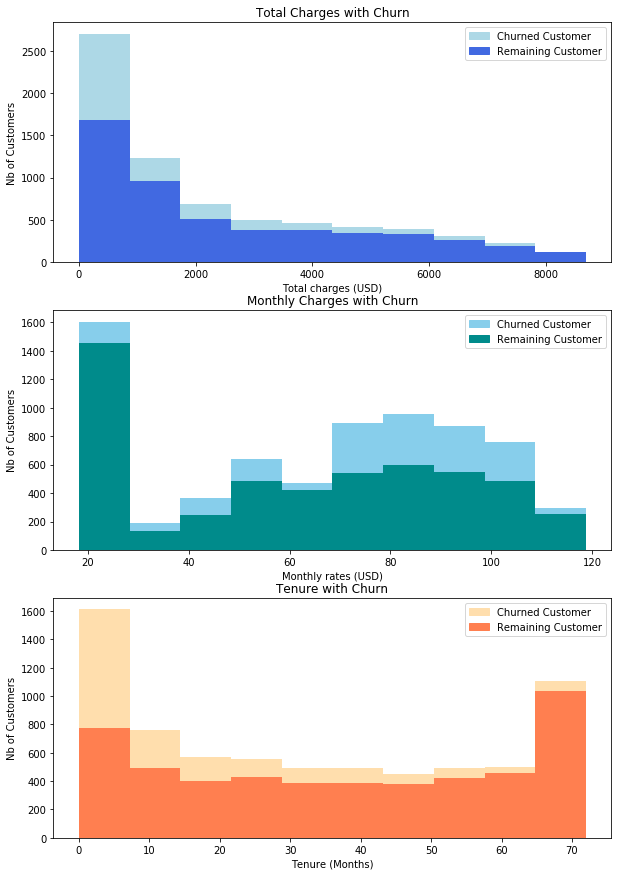

In [15]:
#Plotting including churn, there seems to be a highest churn for low tenure high monthly charges
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.hist([data[data.Churn=="No"].TotalCharges,[data[data.Churn=="Yes"].TotalCharges]],color=["royalblue","lightblue"],stacked=True) 
plt.title('Total Charges with Churn')
plt.ylabel('Nb of Customers')
plt.xlabel('Total charges (USD)')
churn_yes = mpatches.Patch(color='lightblue', label='Churned Customer')
churn_no = mpatches.Patch(color='royalblue', label='Remaining Customer')
plt.legend(handles=[churn_yes,churn_no])
plt.subplot(3, 1, 2)
plt.hist([data[data.Churn=="No"].MonthlyCharges,[data[data.Churn=="Yes"].MonthlyCharges]],color=["darkcyan","skyblue"],stacked=True) 
plt.title('Monthly Charges with Churn')
plt.ylabel('Nb of Customers')
plt.xlabel('Monthly rates (USD)')
churn_yes = mpatches.Patch(color='skyblue', label='Churned Customer')
churn_no = mpatches.Patch(color='darkcyan', label='Remaining Customer')
plt.legend(handles=[churn_yes,churn_no])

plt.subplot(3, 1, 3)
plt.hist([data[data.Churn=="No"].tenure,[data[data.Churn=="Yes"].tenure]],color=["coral","navajowhite"],stacked=True) 
plt.title('Tenure with Churn')
plt.ylabel('Nb of Customers')
plt.xlabel('Tenure (Months)')
churn_yes = mpatches.Patch(color='navajowhite', label='Churned Customer')
churn_no = mpatches.Patch(color='coral', label='Remaining Customer')
plt.legend(handles=[churn_yes,churn_no])
plt.show()

plt.show()

# Churn and the Numeric parameters
Replotting the same histograms as previously, but this time including the Churn in a lighter color, we notice a higher churn for :
    - Shorter tenures
    - Higher Monthly rates

# Looking at categorical values

In [97]:
columns_to_categorize = list(data.select_dtypes(include='object').columns)
columns_to_categorize.remove('customerID')
data_all_num = data.drop(labels=['customerID'], axis=1).copy()

In [98]:
for column in columns_to_categorize:
    print(column,data[column].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [99]:
#Drop the "No phone service"
for col in ["MultipleLines","InternetService","OnlineBackup","OnlineSecurity"
            ,"DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]:
    data_all_num.loc[data_all_num[col].str.contains("No"),col] = "No"

In [100]:
for column in columns_to_categorize:
    print(column,data_all_num[column].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [101]:
data_all_num["PaymentAutomatic"] = data.PaymentMethod.str.contains("automatic").astype(pd.np.int64)



In [102]:
data_all_num.InternetService = data_all_num.InternetService.map({'DSL': 1, 'Fiber optic': 2, 'No': 0})
data_all_num.Contract = data_all_num.Contract.map({'Month-to-month':1, 'One year':12 ,'Two year':24})
data_all_num["PaymentAutomatic"] = data_all_num.PaymentMethod.str.contains("automatic").astype(pd.np.int64)
data_all_num.PaymentMethod = data_all_num.PaymentMethod.map({'Electronic check':2, 'Mailed check':0
                                                             ,'Bank transfer (automatic)':3
                                                             ,'Credit card (automatic)':1})
data_all_num["under_contract"] = (data_all_num.Contract >= data_all_num.tenure).astype(pd.np.int64)

In [103]:
for column in columns_to_categorize:
    print(column,data_all_num[column].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService [1 2 0]
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract [ 1 12 24]
PaperlessBilling ['Yes' 'No']
PaymentMethod [2 0 3 1]
Churn ['No' 'Yes']


In [104]:
#Create Dummies
columns_to_categorize = list(data_all_num.select_dtypes(include='object').columns)
for column in columns_to_categorize:
    dfDummies = pd.get_dummies(data_all_num[column], prefix = column,drop_first=True)
    data_all_num.drop(labels=[column], axis=1,inplace=True)
    data_all_num = pd.concat([data_all_num,dfDummies], axis=1)
    

In [105]:
for column in data_all_num.columns:
    print(column,data_all_num[column].unique())

SeniorCitizen [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
InternetService [1 2 0]
Contract [ 1 12 24]
PaymentMethod [2 0 3 1]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
PaymentAutomatic [0 1]
under_contract [1 0]
gender_Male [0 1]
Partner_Yes [1 0]
Dependents_Yes [0 1]
PhoneService_Yes [0 1]
MultipleLines_Yes [0 1]
OnlineSecurity_Yes [0 1]
OnlineBackup_Yes [1 0]
DeviceProtection_Yes [0 1]
TechSupport_Yes [0 1]
StreamingTV_Yes [0 1]
StreamingMovies_Yes [0 1]
PaperlessBilling_Yes [1 0]
Churn_Yes [0 1]


In [106]:
pd.crosstab(data_all_num.under_contract,data_all_num.Churn_Yes,margins=True, normalize="columns")

Churn_Yes,0,1,All
under_contract,,,
0,0.904716,0.789727,0.874201
1,0.095284,0.210273,0.125799


# RF
There is not missing data for the caterigorical values.

In [107]:
data_all_num.columns

Index(['SeniorCitizen', 'tenure', 'InternetService', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'PaymentAutomatic',
       'under_contract', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'Churn_Yes'],
      dtype='object')

In [108]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score,train_test_split

rfc_first = ensemble.RandomForestClassifier()
X = data_all_num.drop('Churn_Yes', 1)
Y = data_all_num['Churn_Yes']

cross_val_score(rfc_first, X, Y, cv=10)

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

array([0.7858156 , 0.80425532, 0.77446809, 0.78865248, 0.79545455,
       0.75      , 0.79119318, 0.79403409, 0.78551136, 0.81081081])

In [109]:
rfc_first.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [110]:
#Before we go further, lets split the data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc_for_tuning = ensemble.RandomForestClassifier()


# parameters for GridSearchCV
param_grid2 = {"n_estimators": range(10,2000,100),
              "max_depth": [None, 3, 5]+list(range(10,2000,100)),
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1],
               'bootstrap': [True, False],
               'max_features': ['auto', 'sqrt'],
              "class_weight":["balanced_subsample","balanced",None]}
grid_search = GridSearchCV(rfc_for_tuning, param_grid=param_grid2,n_jobs=-1)
grid_search.fit(X_train, y_train)

In [111]:
X_train.shape

(6338, 21)

In [112]:
from sklearn.model_selection import RandomizedSearchCV

rfc_for_tuning = ensemble.RandomForestClassifier()


# parameters for GridSearchCV
param_grid_random = {'bootstrap': [True, False],
                     "criterion":["entropy","gini"],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt','log2',None],
         'min_samples_leaf': [1,2, 5, 10,20,30,40,50,60,70],
         'min_samples_split': [2, 5, 10,20,30,40,50,60,70],
         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000,2200,2400,2500],
         "class_weight":["balanced_subsample","balanced",None]}
grid_search_random = RandomizedSearchCV(rfc_for_tuning, param_distributions=param_grid_random,n_jobs=-1)
grid_search_random.fit(X_train, y_train)

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'criterion': ['entropy', 'gini'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70], 'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2500], 'class_weight': 

In [113]:
#print(grid_search.best_params_)
print(grid_search_random.best_params_)


{'n_estimators': 1800, 'min_samples_split': 40, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}


In [114]:
model = rfc_for_tuning.fit(X_train,y_train)

_y = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(_y,y_test)
print(confusionMatrix)
from sklearn.metrics import accuracy_score
print(roc_auc_score(_y,y_test))
accuracy_score(_y,y_test)

[[486  97]
 [ 46  76]]
0.7282850153249164


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7971631205673759

In [115]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_res, Y_res = sm.fit_sample(X_train, y_train.ravel())

In [116]:
print(sum(Y)/len(Y),sum(Y_res)/len(Y_res))

0.2653698707936959 0.5


In [117]:
rfc_for_smote = ensemble.RandomForestClassifier()

grid_search_smote = RandomizedSearchCV(rfc_for_tuning, param_distributions=param_grid_random,n_jobs=-1)
grid_search_smote.fit(X_res, Y_res)

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'criterion': ['entropy', 'gini'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70], 'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2500], 'class_weight': ['ba

In [118]:
print(grid_search_smote.best_params_)

{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}


In [119]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import time


In [120]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

rfc_better = ensemble.RandomForestClassifier(**grid_search_smote.best_params_)
skf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X_res, Y_res):
    start_time = time.time()
    model = rfc_better.fit(X_res[train_index],Y_res[train_index])
    _y_smote = model.predict(X_res[test_index])
    print("--- %s seconds ---" % (time.time() - start_time))
    print(roc_auc_score(_y_smote,Y_res[test_index]))
   

--- 10.958417892456055 seconds ---
0.8676421678886505
--- 10.463752031326294 seconds ---
0.8710132813225596
--- 9.986790895462036 seconds ---
0.8572202423875065
--- 9.908557891845703 seconds ---
0.8535533749628308
--- 9.47377610206604 seconds ---
0.8496771301802288


In [121]:
model = rfc_better.fit(X_res,Y_res)

_y_smote = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(_y_smote,y_test)
print(confusionMatrix)
from sklearn.metrics import accuracy_score
print(roc_auc_score(_y_smote,y_test))
accuracy_score(_y_smote,y_test)

[[466  75]
 [ 66  98]]
0.7294644064740093


0.8

In [60]:
rfc_first.fit(X_train,y_train)
__y = rfc_first.predict(X_test)
confusion_matrix(__y,y_test)

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[475, 101],
       [ 50,  79]])

In [62]:
from sklearn.metrics import recall_score,precision_score
print("Recall")
print(recall_score(__y,y_test))
#print(recall_score(_y,y_test))
print(recall_score(_y_smote,y_test))
print("Precision")


print(precision_score(__y,y_test))
#print(precision_score(_y,y_test))
print(precision_score(_y_smote,y_test))





Recall
0.6124031007751938
0.5823529411764706
Precision
0.4388888888888889
0.55


Recall
0.6533333333333333
0.6891891891891891
0.63
Precision
0.5025641025641026
0.26153846153846155
0.6461538461538462

In [122]:
to_drop = [x[1] for x in sorted(zip(rfc_better.feature_importances_,X.columns))]


In [123]:
to_drop

['PhoneService_Yes',
 'under_contract',
 'DeviceProtection_Yes',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'MultipleLines_Yes',
 'SeniorCitizen',
 'gender_Male',
 'OnlineBackup_Yes',
 'Partner_Yes',
 'Dependents_Yes',
 'TechSupport_Yes',
 'PaymentMethod',
 'OnlineSecurity_Yes',
 'MonthlyCharges',
 'TotalCharges',
 'PaperlessBilling_Yes',
 'InternetService',
 'PaymentAutomatic',
 'tenure',
 'Contract']

In [124]:
dropped_feature = []
for col in to_drop:
    dropped_feature.append(col)
    X_drop_some = X_train.drop(dropped_feature,axis=1)
    X_drop_some, Y_res = sm.fit_sample(X_drop_some, y_train.ravel())
    rfc_feather_drop = ensemble.RandomForestClassifier()
    grid_feather_drop = RandomizedSearchCV(rfc_feather_drop
                                           , param_distributions=param_grid_random
                                           ,n_jobs=-1)
    grid_feather_drop.fit(X_drop_some,Y_res)
    rfc_better = ensemble.RandomForestClassifier(**grid_feather_drop.best_params_)
    model_feather_drop = rfc_feather_drop.fit(X_drop_some,Y_res)
    _y_drop = model_feather_drop.predict(X_test.drop(dropped_feature,axis=1))
    print(f"Droppping {col}")
    print("recall",recall_score(_y_drop,y_test))
    print("precision",precision_score(_y_drop,y_test))
    print("roc_auc",roc_auc_score(_y_drop,y_test))
    print("accurary",accuracy_score(_y_drop,y_test))








    

/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping PhoneService_Yes
recall 0.6048387096774194
precision 0.43352601156069365
roc_auc 0.7180820054411193
accurary 0.7914893617021277


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping under_contract
recall 0.5769230769230769
precision 0.43352601156069365
roc_auc 0.7032441471571906
accurary 0.7829787234042553


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping DeviceProtection_Yes
recall 0.5748031496062992
precision 0.42196531791907516
roc_auc 0.7008963844917309
accurary 0.7815602836879433


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping StreamingMovies_Yes
recall 0.6016260162601627
precision 0.4277456647398844
roc_auc 0.7157614617383287
accurary 0.7900709219858156


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping StreamingTV_Yes
recall 0.635593220338983
precision 0.43352601156069365
roc_auc 0.7343213120434269
accurary 0.8


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping MultipleLines_Yes
recall 0.6031746031746031
precision 0.4393063583815029
roc_auc 0.71782218932478
accurary 0.7914893617021277


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping SeniorCitizen
recall 0.6363636363636364
precision 0.44508670520231214
roc_auc 0.7359900373599003
accurary 0.8014184397163121


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping gender_Male
recall 0.5905511811023622
precision 0.43352601156069365
roc_auc 0.7105005040459909
accurary 0.7872340425531915


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping OnlineBackup_Yes
recall 0.5564516129032258
precision 0.3988439306358382
roc_auc 0.6887249458664151
accurary 0.774468085106383


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping Partner_Yes
recall 0.5314685314685315
precision 0.4393063583815029
roc_auc 0.6794353333499241
accurary 0.7673758865248227


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping Dependents_Yes
recall 0.5285714285714286
precision 0.4277456647398844
roc_auc 0.6766750948166877
accurary 0.7659574468085106


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping TechSupport_Yes
recall 0.5642857142857143
precision 0.45664739884393063
roc_auc 0.6989570164348926
accurary 0.7801418439716312


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping PaymentMethod
recall 0.5138888888888888
precision 0.4277456647398844
roc_auc 0.6687091503267972
accurary 0.7602836879432624


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping OnlineSecurity_Yes
recall 0.4906832298136646
precision 0.45664739884393063
roc_auc 0.6589445560833027
accurary 0.750354609929078


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping MonthlyCharges
recall 0.44571428571428573
precision 0.4508670520231214
roc_auc 0.6332345013477089
accurary 0.7276595744680852


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping TotalCharges
recall 0.4383561643835616
precision 0.7398843930635838
roc_auc 0.6646986633055822
accurary 0.7035460992907802


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping PaperlessBilling_Yes
recall 0.45394736842105265
precision 0.7976878612716763
roc_auc 0.6833327864549154
accurary 0.7148936170212766


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping InternetService
recall 0.4174174174174174
precision 0.8034682080924855
roc_auc 0.6630097839775259
accurary 0.676595744680851


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Droppping PaymentAutomatic
recall 0.40963855421686746
precision 0.7861271676300579
roc_auc 0.6552214218805517
accurary 0.6695035460992907
Droppping tenure
recall 0.4
precision 0.8554913294797688
roc_auc 0.6626865671641791
accurary 0.649645390070922


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Found array with 0 feature(s) (shape=(6338, 0)) while a minimum of 1 is required.

In [125]:
from xgboost import XGBClassifier

In [183]:
param_test1 = {
    'max_depth':range(3,10,1),
    'min_child_weight':range(1,4,1),
    'scale_pos_weight' : [1],
    'n_estimators': list(range(22,24,1)),
    'learning_rate' : [0.1]
}
to_optimize = XGBClassifier(learning_rate =0.1, 
                            n_estimators=1000,max_depth=5, n_thread=2,
                            min_child_weight=1,
                            gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', scale_pos_weight=1 )
gsearch1 = GridSearchCV(to_optimize, param_grid=param_test1)

gsearch1.fit(X,Y)


/Users/severinhatt/Virtualenvs/thinkful/base_plotting/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, n_thread=2, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 10), 'min_child_weight': range(1, 4), 'scale_pos_weight': [1], 'n_estimators': [22, 23], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
gsearch1.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 23,
 'scale_pos_weight': 1}

In [129]:
sum(y_train==False)/sum(y_train)

2.7370283018867925

In [205]:
X_res, Y_res = sm.fit_sample(X_train, y_train.ravel());
X_res = pd.DataFrame.from_records(X_res,columns=X_train.columns)
param = {'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 23,
         'scale_pos_weight':2.7
         , 'eta':0.05, 'silent':1
         , "eval_metric":"aucpr",'objective':'binary:logistic'}
num_round = 150
dtest = xgboost.DMatrix(X_test, label=y_test)
dtrain = xgboost.DMatrix(X_train, label=y_train)
watchlist = [(xgboost.DMatrix(X_test, label=y_test), 'eval')
             , (xgboost.DMatrix(X_res, label=Y_res), 'train')]

bst = xgboost.train(param, dtrain, num_round)#, watchlist)

#dall = xgboost.DMatrix(X, label=Y)
#xgboost.cv(param, dall, num_round, nfold=5,
#       metrics={'error',"auc","aucpr"}, 
#       callbacks=[xgboost.callback.print_evaluation(show_stdv=True)])
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_res, label=Y_res), 100);
#dtest = xgboost.DMatrix(X_test)
#A = model.predict(dtest)

In [206]:
preds = bst.predict(dtest)
labels = dtest.get_label()
print('error=%f' % (sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i]) / float(len(preds))))

error=0.252482


In [207]:
print(precision_score((preds>0.50),labels))
print(recall_score((preds>0.50),labels))

0.6878612716763006
0.4897119341563786


In [208]:
X_res, Y_res = sm.fit_sample(X_train, y_train.ravel());
X_res = pd.DataFrame.from_records(X_res,columns=X_train.columns)
param = {'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 23,
         'scale_pos_weight':1
         , 'eta':0.05, 'silent':1
         , "eval_metric":"aucpr",'objective':'binary:logistic'}
num_round = 150
dtest = xgboost.DMatrix(X_test, label=y_test)
dtrain = xgboost.DMatrix(X_train, label=y_train)
watchlist = [(xgboost.DMatrix(X_test, label=y_test), 'eval')
             , (xgboost.DMatrix(X_res, label=Y_res), 'train')]

bst = xgboost.train(param, dtrain, num_round)#, watchlist)

#dall = xgboost.DMatrix(X, label=Y)
#xgboost.cv(param, dall, num_round, nfold=5,
#       metrics={'error',"auc","aucpr"}, 
#       callbacks=[xgboost.callback.print_evaluation(show_stdv=True)])
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_res, label=Y_res), 100);
#dtest = xgboost.DMatrix(X_test)
#A = model.predict(dtest)

In [209]:
preds = bst.predict(dtest)
labels = dtest.get_label()
print('error=%f' % (sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i]) / float(len(preds))))

error=0.197163


In [210]:
print(precision_score((preds>0.50),labels))
print(recall_score((preds>0.50),labels))

0.47398843930635837
0.6307692307692307


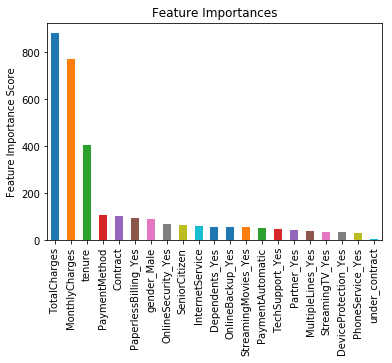

In [211]:
feat_imp = pd.Series(bst.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score');

In [212]:
list(reversed(to_drop))

['Contract',
 'tenure',
 'PaymentAutomatic',
 'InternetService',
 'PaperlessBilling_Yes',
 'TotalCharges',
 'MonthlyCharges',
 'OnlineSecurity_Yes',
 'PaymentMethod',
 'TechSupport_Yes',
 'Dependents_Yes',
 'Partner_Yes',
 'OnlineBackup_Yes',
 'gender_Male',
 'SeniorCitizen',
 'MultipleLines_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'DeviceProtection_Yes',
 'under_contract',
 'PhoneService_Yes']

# Looking at the output of the train

In [230]:
X_analysis = X_train.copy()
X_analysis["objectif"] = y_train
preds = bst.predict(dtrain)
X_analysis["pred"] = preds
print('error=%f' % (sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i]) / float(len(preds))))

error=0.137267


In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

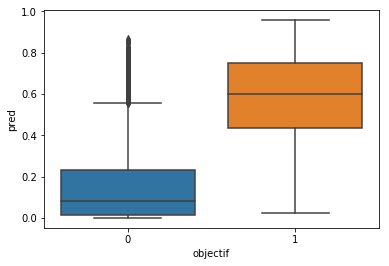

In [227]:
sns.boxplot(data=X_analysis,x="objectif",y="pred")

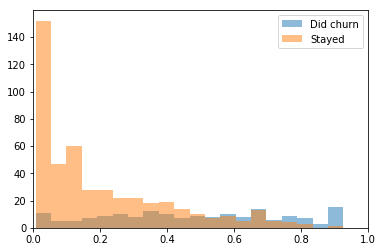

In [276]:
_,bins,_ = plt.hist(X_analysis[X_analysis.objectif == 1].pred,alpha=0.5
                    ,label="Did churn",bins=20)
plt.hist(X_analysis[X_analysis.objectif == 0].pred,bins=bins,alpha=0.5
                    ,label="Stayed")
plt.legend()
plt.xlim(0,1);

In [272]:
x=[]
y=[]
y2=[]
for i in range(25,75,2):
    prediction_limit = i/100
    x.append(prediction_limit)
    y.append(precision_score((preds>prediction_limit),labels))
    y2.append(recall_score((preds>prediction_limit),labels))


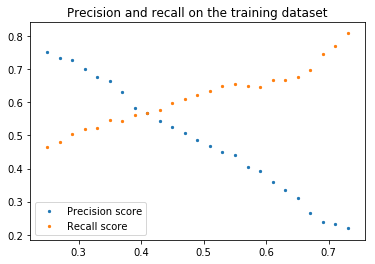

In [273]:
plt.scatter(x,y,label="Precision score",s=5)
plt.scatter(x,y2,label="Recall score",s=5)
plt.title("Precision and recall on the training dataset")
plt.legend();

# Confirming on the test set

In [257]:
X_analysis = X_test.copy()
X_analysis["objectif"] = y_test
preds = bst.predict(dtest)
labels = dtest.get_label()
X_analysis["pred"] = preds
print('error=%f' % (sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i]) / float(len(preds))))

error=0.197163


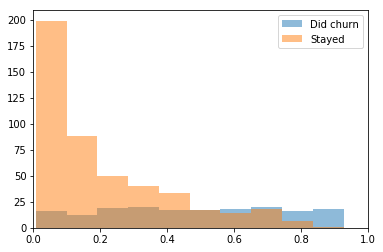

In [277]:
_,bins,_ = plt.hist(X_analysis[X_analysis.objectif == 1].pred,alpha=0.5
                    ,label="Did churn",bins=10)
plt.hist(X_analysis[X_analysis.objectif == 0].pred,bins=bins,alpha=0.5
                    ,label="Stayed")
plt.legend()
plt.xlim(0,1);

In [274]:
x=[]
y=[]
y2=[]
for i in range(25,75,1):
    prediction_limit = i/100
    x.append(prediction_limit)
    y.append(precision_score((preds>prediction_limit),labels))
    y2.append(recall_score((preds>prediction_limit),labels))

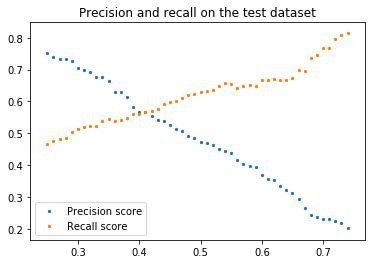

In [275]:
plt.scatter(x,y,label="Precision score",s=5)
plt.scatter(x,y2,label="Recall score",s=5)
plt.title("Precision and recall on the test dataset")
plt.legend();